# Chapter 16 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbin

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

# Riding lawnmower example

 Load the data. We can get the data from the dmba package.

In [2]:
import dmba
mower_df = dmba.load_data("RidingMowers.csv")

 Define new customer at (60, 20)

In [3]:
import pandas as pd
new_customer = pd.DataFrame({"Income": 60, "Lot_Size": 20},
                            index=["New customer"])
new_customer

,Income,Lot_Size
New customer,60,20


 Visualize dataset with new customer at (60, 20)

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


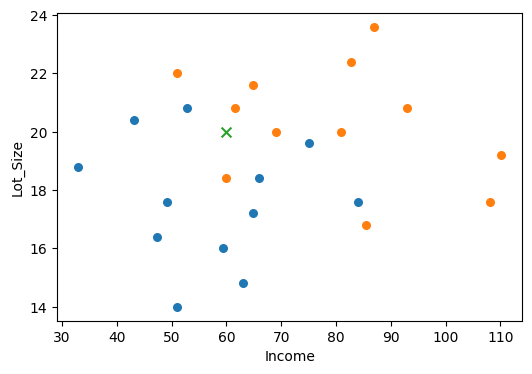

In [4]:
import matplotlib.pyplot as plt

owners = mower_df[mower_df["Ownership"] == "Owner"]
non_owners = mower_df[mower_df["Ownership"] == "Nonowner"]

def basic_mower_plot():
    fig, ax = plt.subplots(figsize=(6, 4))
    owners.plot.scatter(x="Income", y="Lot_Size", c="C1", s=30, ax=ax)
    non_owners.plot.scatter(x="Income", y="Lot_Size", c="C0", s=30, ax=ax)
    new_customer.plot.scatter(x="Income", y="Lot_Size", c="C2", marker="x", s=50, ax=ax)
    return ax
basic_mower_plot()

 Calculate distances of new customer to dataset

In [5]:
import numpy as np
predictors = ["Income", "Lot_Size"]
distances = mower_df[predictors] - new_customer[predictors].to_numpy()
mower_df["distance"]= np.sqrt(((distances/mower_df[predictors].std())**2).sum(axis=1))
neighbors_by_distance = mower_df.sort_values(by="distance")

 Identify closest neighbor $k=1$

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


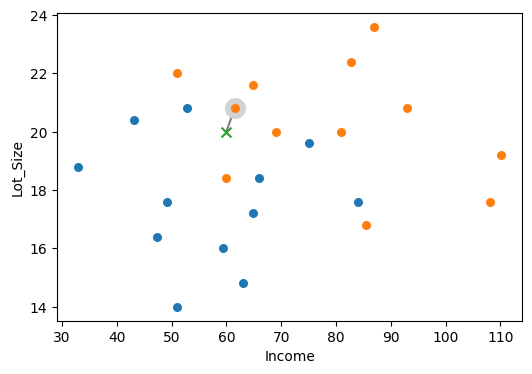

In [6]:
ax = basic_mower_plot()
new_c = new_customer.to_numpy().flatten()
for k in range(1):
    neighbor = neighbors_by_distance[predictors].iloc[k, :].to_numpy()
    ax.plot([new_c[0], neighbor[0]], [new_c[1], neighbor[1]], color="grey", zorder=0)
    ax.scatter(neighbor[0], neighbor[1], color="lightgrey", s=200, zorder=0)

 Identify closest neighbors $k=5$

/Users/petergedeck/opt/miniconda3/envs/mlba-r/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


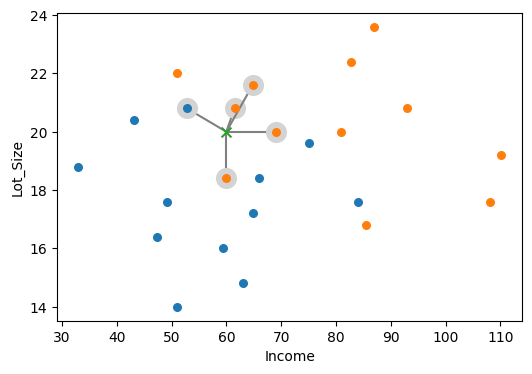

In [7]:
ax = basic_mower_plot()
new_c = new_customer.to_numpy().flatten()
for k in range(5):
    neighbor = neighbors_by_distance[predictors].iloc[k, :].to_numpy()
    ax.plot([new_c[0], neighbor[0]], [new_c[1], neighbor[1]], color="grey", zorder=0)
    ax.scatter(neighbor[0], neighbor[1], color="lightgrey", s=200, zorder=0)

# Hypothetical example

 Create the data frame

In [8]:
import pandas as pd
df = pd.DataFrame([
    [1, 1, 1, 1, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [1, 1, 0, 1, 1, 0, 1],
    [0, 0, 1, 0, 1, 0, 1],
],
index=["1", "2", "3", "4", "5", "6"],
columns=["zinc10", "zinc90", "mag10", "mag90",
         "cotton10", "cotton90", "Registry"])

 Calculate Euclidean distance to new customer

In [9]:
import numpy as np
predictors = [ "zinc10", "zinc90", "mag10", "mag90",
        "cotton10", "cotton90"]
df[predictors]

new_customer = np.array([1, 0, 1, 1, 0, 1])
distances = np.sqrt(np.sum((df[predictors] - new_customer) ** 2, axis=1))
min_distances = np.where(distances == distances.min())

closest_customers = df.iloc[min_distances[0], :]
closest_customers

,zinc10,zinc90,mag10,mag90,cotton10,cotton90,Registry
1,1,1,1,1,0,1,0
2,1,1,1,1,0,1,0
